In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_student = pd.read_csv("student_scores.csv", delimiter=",", header=0)
df_student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df_student

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Handling Feature Engineering

In [4]:
# Cek duplikat
print("Duplicated rows:", df_student.duplicated().sum())

Duplicated rows: 0


In [5]:
# Cek missing value
print("Missing values:\n", df_student.isnull().sum())

Missing values:
 Hours     0
Scores    0
dtype: int64


In [6]:
print(df_student.dtypes)

Hours     float64
Scores      int64
dtype: object


In [7]:
df_student['Hours'] = pd.to_numeric(df_student['Hours'], errors='coerce')
df_student['Scores'] = pd.to_numeric(df_student['Scores'], errors='coerce')

#### Exploratory Data Analysis (EDA)


Descriptive Statistics:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


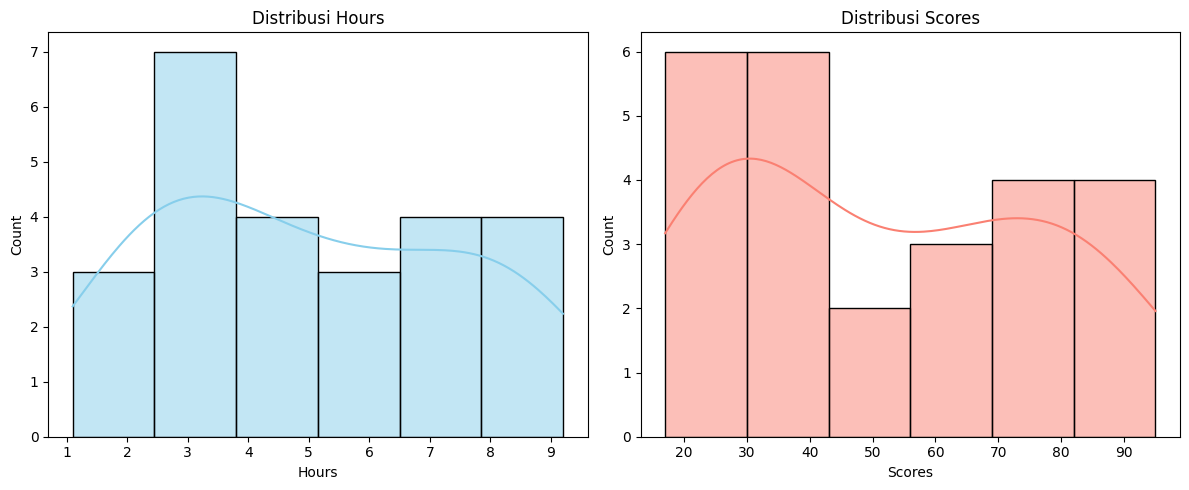

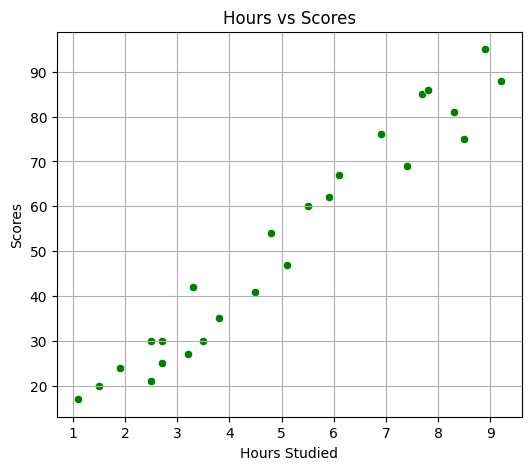

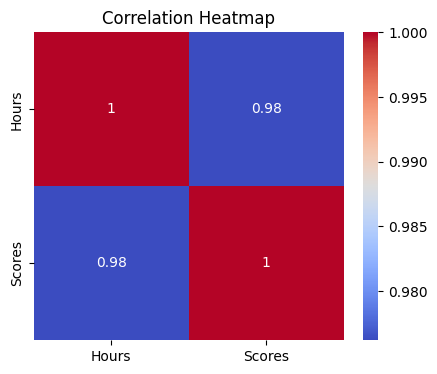

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Statistik deskriptif
print("\nDescriptive Statistics:")
print(df_student.describe())

# 2. Distribusi setiap kolom
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_student['Hours'], kde=True, color='skyblue')
plt.title('Distribusi Hours')

plt.subplot(1, 2, 2)
sns.histplot(df_student['Scores'], kde=True, color='salmon')
plt.title('Distribusi Scores')

plt.tight_layout()
plt.show()

# 3. Scatter plot untuk hubungan X dan Y
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Hours', y='Scores', data=df_student, color='green')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

# 4. Heatmap korelasi
plt.figure(figsize=(5, 4))
sns.heatmap(df_student.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

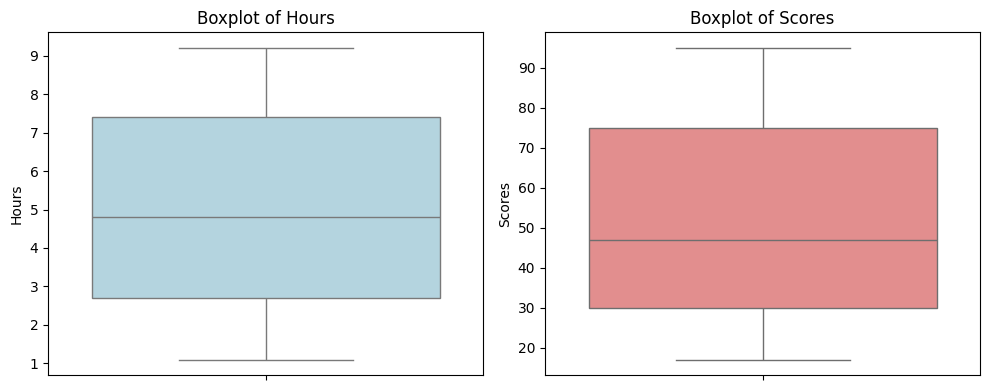

In [9]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y='Hours', data=df_student, color='lightblue')
plt.title('Boxplot of Hours')

plt.subplot(1, 2, 2)
sns.boxplot(y='Scores', data=df_student, color='lightcoral')
plt.title('Boxplot of Scores')

plt.tight_layout()
plt.show()

In [10]:
# Outlier Analysis
Q1 = df_student.quantile(0.25)
Q3 = df_student.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_student < (Q1 - 1.5 * IQR)) | (df_student > (Q3 + 1.5 * IQR))).sum()
print("\nOutlier count:\n", outliers)


Outlier count:
 Hours     0
Scores    0
dtype: int64


In [11]:
# Split Datasets
X = df_student[['Hours']]
y = df_student['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling Machine Learning Regression

In [12]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [13]:
# Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

### Model Evaluation

In [14]:
print("Linear Regression")
print('')

print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R2:", r2_score(y_test, y_pred_lin))

Linear Regression

MSE: 18.943211722315272
R2: 0.9678055545167994


In [15]:
print("Decision Tree Regressor")
print('')

print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R2:", r2_score(y_test, y_pred_tree))

Decision Tree Regressor

MSE: 31.7
R2: 0.9461250849762066


In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [17]:
print("Random Forest Regressor")
print('')

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("R-squared (R2):", r2_score(y_test, y_pred_rf))

Random Forest Regressor

Mean Squared Error (MSE): 13.045153611111104
R-squared (R2): 0.9778294466160586


#### Apa arti MSE dan R²?

MSE (Mean Squared Error):

- Mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual.

- Semakin kecil nilainya, semakin akurat model tersebut.

- Contoh: MSE = 357 artinya, rata-rata kesalahan kuadrat prediksi sekitar 357.

R² (R-squared / Koefisien Determinasi):

- Mengukur seberapa besar variasi dari target (y) bisa dijelaskan oleh model.

- Nilai antara 0 dan 1 (kadang bisa negatif kalau modelnya jelek banget).

- Contoh: R² = 0.393 berarti model menjelaskan 39.3% variasi dari nilai asli, sisanya mungkin karena noise/data lain yang tidak dijelaskan model.

### Ringkasan Evaluasi Model:

| **Model**                  | **MSE** | **R² Score** |
|----------------------------|--------:|-------------:|
| Linear Regression          | 18.94   | 0.968        |
| Decision Tree Regressor   | 31.70   | 0.946        |
| **Random Forest Regressor** | **13.05** | **0.978**    |

### Data Visualization

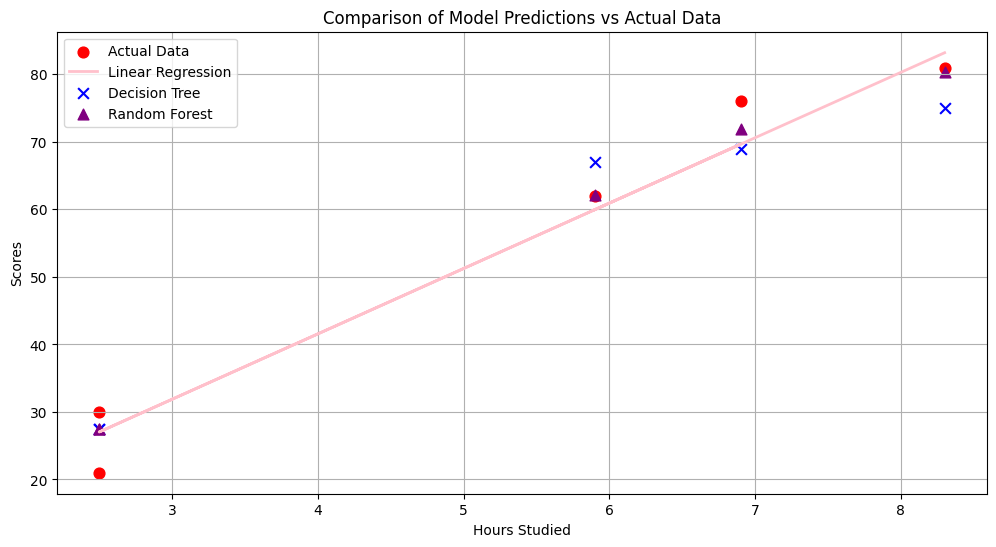

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Titik data asli
plt.scatter(X_test, y_test, color='red', label='Actual Data', s=60)

# Hasil prediksi dari ketiga model
plt.plot(X_test, y_pred_lin, color='pink', label='Linear Regression', linewidth=2)
plt.scatter(X_test, y_pred_tree, color='blue', label='Decision Tree', marker='x', s=60)
plt.scatter(X_test, y_pred_rf, color='purple', label='Random Forest', marker='^', s=60)
plt.title('Comparison of Model Predictions vs Actual Data')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

### Kesimpulan

**Random Forest Regressor** adalah model terbaik untuk dataset ini karena:

- MSE paling rendah (13.05): menunjukkan bahwa prediksi model ini paling mendekati nilai sebenarnya dibandingkan model lain.

- R² paling tinggi (0.978): berarti model ini mampu menjelaskan sekitar 97.78% variasi dari data target (Scores), lebih baik dibandingkan Linear Regression (R² = 0.968) dan Decision Tree Regressor (R² = 0.946).

